In [ ]:
from google.colab import drive
drive.mount('/content/drive/MyDrive')

Drive already mounted at /content/drive/MyDrive; to attempt to forcibly remount, call drive.mount("/content/drive/MyDrive", force_remount=True).


In [ ]:
from __future__ import division, unicode_literals, print_function  # for compatibility with Python 2 and 3

import matplotlib as mpl
import matplotlib.pyplot as plt

# change the following to %matplotlib notebook for interactive plotting
%matplotlib inline
import pandas as pd
# Optionally, tweak styles.
mpl.rc('figure',  figsize=(10, 5))
mpl.rc('image', cmap='gray')

In [ ]:
!pip install https://github.com/soft-matter/trackpy/archive/master.zip

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     - 10.7 MB 1.5 MB/s
  Created wheel for trackpy: filename=trackpy-0+unknown-py3-none-any.whl size=129741 sha256=3380f39efc9e79cb284d569b6bfcb50bb96d9ea738e05b15ac6ead3bb4c8ed52
  Stored in directory: /tmp/pip-ephem-wheel-cache-izy5g0m2/wheels/00/c1/4a/6570b21b2285603e13fac09ef01822a3d71ce67838c6dcbafc
Successfully built trackpy


In [ ]:
!pip install PIMS

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 86 kB 3.5 MB/s 
  Created wheel for PIMS: filename=PIMS-0.6.1-py3-none-any.whl size=82636 sha256=4b6d0386a8f258197f497690e9abf2e7b746ab51b117253c495175585e2c9354
  Stored in directory: /root/.cache/pip/wheels/8e/d5/a9/f702433436655b7a2bc7ff93efd742587dd5abd44f7e406917
Successfully built PIMS


In [ ]:
import numpy as np
import pandas as pd
from pandas import DataFrame, Series  # for convenience

import pims
import trackpy as tp

In [ ]:
images = pims.open('/content/drive/Shareddrives/BS191_SectionVI_Group2/square/*.tif')
#images = pims.open('/content/Images/img_0_00018.tif')

Frame([[74, 81, 88, ..., 56, 61, 67],
       [80, 85, 92, ..., 60, 64, 66],
       [82, 88, 93, ..., 68, 69, 66],
       ...,
       [68, 68, 67, ..., 72, 75, 79],
       [71, 70, 67, ..., 73, 72, 73],
       [70, 67, 64, ..., 75, 71, 71]], dtype=uint8)
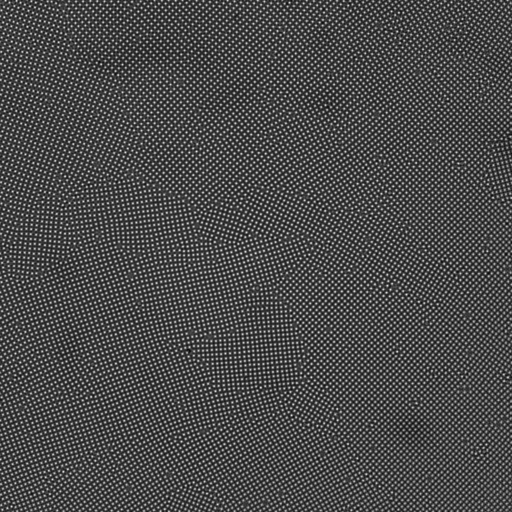

In [ ]:
images[2500]

In [ ]:
print(images[300])

[[67 64 61 ... 61 60 63]
 [70 66 65 ... 66 67 66]
 [70 67 67 ... 71 72 68]
 ...
 [92 83 77 ... 78 78 83]
 [93 86 77 ... 85 83 82]
 [88 83 77 ... 87 86 81]]


In [ ]:
check = plt.imread('/content/drive/Shareddrives/BS191_SectionVI_Group2/square/img_0_00111.tif')
check

array([[[ 75,  75,  75, 255],
        [ 76,  76,  76, 255],
        [ 75,  75,  75, 255],
        ...,
        [ 64,  64,  64, 255],
        [ 67,  67,  67, 255],
        [ 66,  66,  66, 255]],

       [[ 79,  79,  79, 255],
        [ 78,  78,  78, 255],
        [ 80,  80,  80, 255],
        ...,
        [ 75,  75,  75, 255],
        [ 74,  74,  74, 255],
        [ 69,  69,  69, 255]],

       [[ 81,  81,  81, 255],
        [ 85,  85,  85, 255],
        [ 84,  84,  84, 255],
        ...,
        [ 85,  85,  85, 255],
        [ 82,  82,  82, 255],
        [ 76,  76,  76, 255]],

       ...,

       [[ 87,  87,  87, 255],
        [ 78,  78,  78, 255],
        [ 70,  70,  70, 255],
        ...,
        [ 83,  83,  83, 255],
        [ 79,  79,  79, 255],
        [ 77,  77,  77, 255]],

       [[ 91,  91,  91, 255],
        [ 86,  86,  86, 255],
        [ 80,  80,  80, 255],
        ...,
        [ 86,  86,  86, 255],
        [ 82,  82,  82, 255],
        [ 78,  78,  78, 255]],

       [[ 91

In [ ]:
f = tp.locate(images[0],invert=False,diameter=15,separation = 7,preprocess = True,engine = "numba")
#f = tp.locate(images[0],invert=False,diameter=15,preprocess = True)

In [ ]:
f.head()

,y,x,mass,size,ecc,signal,raw_mass,ep,frame
0,7.508492,206.455602,2883.493635,2.908185,0.034709,88.498166,16138.0,0.048224,0
1,7.575297,417.518441,3505.988015,3.080209,0.049816,97.519823,16770.0,0.043998,0
2,7.346237,446.358737,3196.244434,3.085411,0.028404,89.357371,16691.0,0.044486,0
3,6.567669,473.130326,3085.406926,3.133327,0.054520,83.342933,16489.0,0.045782,0
4,7.132822,863.227960,3693.724415,2.943170,0.033482,106.541481,16976.0,0.042777,0


In [ ]:
f.shape

(12042, 9)

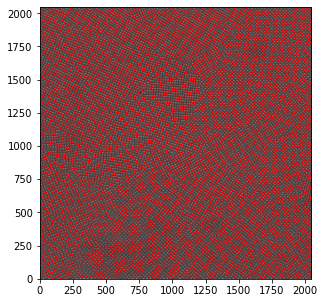

In [ ]:
img=plt.imread('/content/drive/Shareddrives/BS191_SectionVI_Group2/square/img_0_00001.tif')
fig, ax = plt.subplots()
ax.imshow(img,origin = "lower")
ax.plot(f['x'],f['y'],'ro',markersize =0.5)
#plt.plot(f['x'],f['y'],'r.', markersize = 2)

## Histogram of the mass of the particles

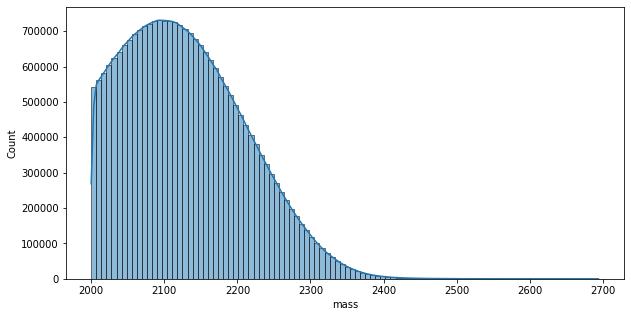

In [ ]:
#


sns.histplot(f['mass'],bins = 100,kde = True)

##Check for subpixel accuracy
As Eric Weeks points out in his related tutorial, a quick way to check for subpixel accuracy is to check that the decimal part of the x and/or y positions are evenly distributed. Trackpy provides a convenience plotting function for this called subpx_bias:

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fdefdc07490>,
      dtype=object)

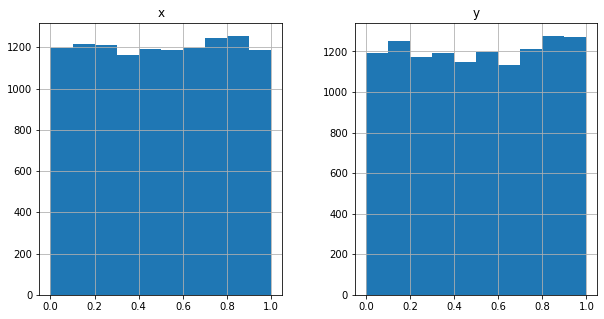

In [ ]:
tp.subpx_bias(f)

###Locate features in all *frames*

In [ ]:
f = tp.batch(images, 11, minmass=2000, invert=False)
#f = tp.batch(images,)

Frame 2999: 9358 features


In [ ]:
t = tp.link(f, 5, memory=3)

Frame 2999: 9358 trajectories present.


The result is the features DataFrame f with an additional column, particle, identifying each feature with a label. We denote this new DataFrame t.

In [ ]:
t.head()

,y,x,mass,size,ecc,signal,raw_mass,ep,frame,particle
0,5.039710,388.521786,2095.118387,2.665881,0.029474,72.189648,11405.0,0.021620,0,0
2973,1109.688120,442.117584,2122.634621,2.847612,0.060717,63.449197,11359.0,0.021764,0,1
2974,1110.322499,1186.301411,2041.704523,2.762320,0.014862,65.715240,11258.0,0.022087,0,2
2975,1111.253172,484.121450,2143.029006,2.859605,0.059587,63.125477,11425.0,0.021558,0,3
2976,1111.157831,786.057421,2131.051351,2.819201,0.007421,66.038960,11607.0,0.021011,0,4


In [ ]:
t.describe()

,y,x,mass,size,ecc,signal,raw_mass,ep,frame,particle
count,2.355230e+07,2.355230e+07,2.355230e+07,2.355230e+07,2.355230e+07,2.355230e+07,2.355230e+07,2.355230e+07,2.355230e+07,2.355230e+07
mean,9.727433e+02,8.558869e+02,2.130617e+03,2.830717e+00,4.428639e-02,6.429898e+01,1.132696e+04,2.079804e-02,1.548410e+03,1.768838e+05
std,5.382061e+02,4.985849e+02,8.136733e+01,6.763429e-02,2.106718e-02,3.947806e+00,2.401167e+02,8.468791e-04,8.330217e+02,1.489051e+05
min,4.647778e+00,4.564672e+00,2.000000e+03,2.534870e+00,1.166541e-05,3.265861e+01,9.978000e+03,1.713909e-02,0.000000e+00,0.000000e+00
25%,5.235988e+02,4.434149e+02,2.065501e+03,2.784577e+00,2.901740e-02,6.189569e+01,1.115700e+04,2.021428e-02,8.810000e+02,3.662400e+04
50%,9.740689e+02,8.362584e+02,2.121978e+03,2.826957e+00,4.259192e-02,6.426183e+01,1.131500e+04,2.079143e-02,1.561000e+03,1.557310e+05
75%,1.410141e+03,1.237801e+03,2.185832e+03,2.873142e+00,5.735688e-02,6.673188e+01,1.148600e+04,2.136311e-02,2.227000e+03,2.985100e+05
max,2.042400e+03,2.042361e+03,2.693910e+03,3.359821e+00,2.671210e-01,9.151088e+01,1.264700e+04,2.686833e-02,2.999000e+03,5.098170e+05


In [ ]:
t[t['frame']==0]['x'].mean()

735.3887686496505

### Verifying Central Limit Theorem 

In [ ]:
x_pos = []

for i in range(0,225):
    x_pos.append(t[t['frame']==i]['x'].mean())

In [ ]:
len(x_pos)

225

Text(0.5, 0, 'X position')

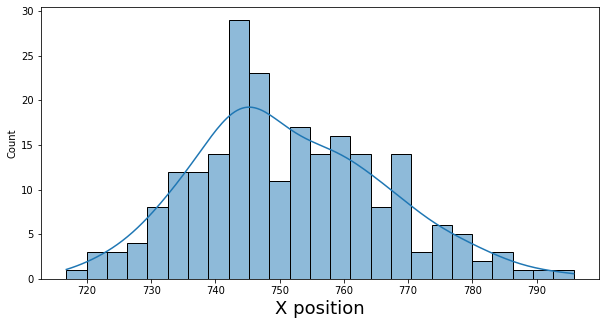

In [ ]:
import seaborn as sns
sns.histplot(data = x_pos,kde = True,bins = 25
             )
plt.xlabel("X position",size  = 18)

### showing How CLT is bulding with increase in number of frames

In [ ]:
x_pos1 = []
x_pos2 = []
x_pos3 = []
x_pos4 = []
x_pos5 = []
x_pos6 = []

for i in range(0,30):
    x_pos1.append(t[t['frame']==i]['x'].mean())

for i in range(0,60):
    x_pos2.append(t[t['frame']==i]['x'].mean())

for i in range(0,90):
    x_pos3.append(t[t['frame']==i]['x'].mean())

for i in range(0,120):
    x_pos4.append(t[t['frame']==i]['x'].mean())

for i in range(0,150):
    x_pos5.append(t[t['frame']==i]['x'].mean())


for i in range(0,225):
    x_pos6.append(t[t['frame']==i]['x'].mean())


    


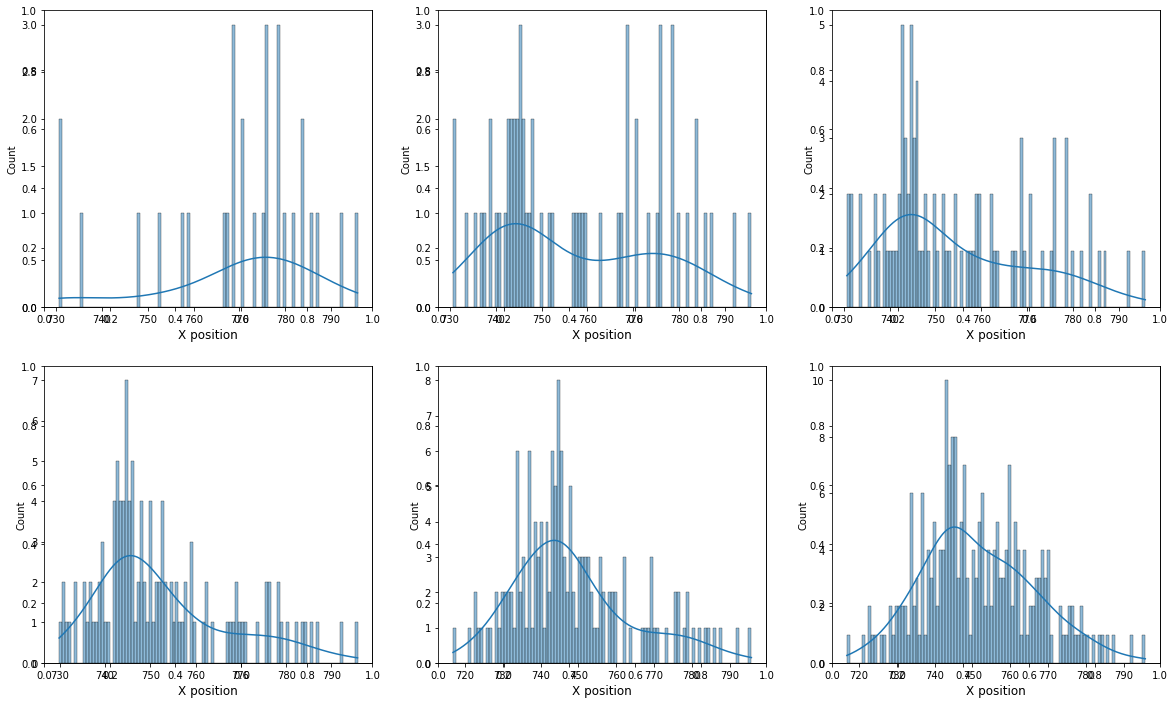

In [ ]:
fig, ax = plt.subplots(2, 3, figsize=(20,12))
columns = 3
rows = 2
frames_no = [x_pos1,x_pos2,x_pos3,x_pos4,x_pos5,x_pos6]
for i in range(1,7):
    fig.add_subplot(rows, columns, i)
    sns.histplot(data = frames_no[i-1],kde = True,bins = 100)
    plt.xlabel("X position",size  = 12)

plt.show()

In [ ]:
y_pos = []

for i in range(0,300):
    y_pos.append(t[t['frame']==i]['y'].mean())

Text(0.5, 0, 'Y position')

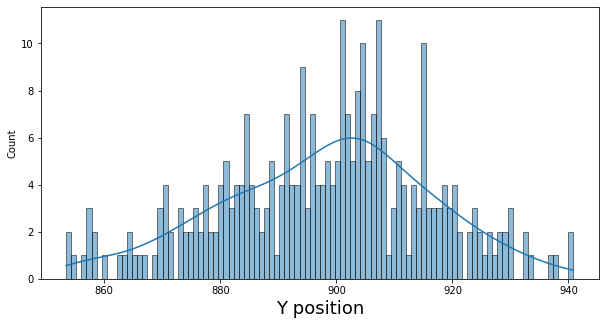

In [ ]:
sns.histplot(data = y_pos,kde = True,bins = 100)
plt.xlabel("Y position",size  = 18)

In [ ]:
# displacement 

#for 

x_frame_0 = list(t[t['frame']==0]['x'])
x_frame_1 = list(t[t['frame']==1]['x'])

x_frame_1_new = x_frame_1[:4473]
l1 = len(x_frame_0)
l2 = len(x_frame_1_new)

(l1,l2)

(4473, 4473)

Text(0.5, 0, 'Displacement in X direction')

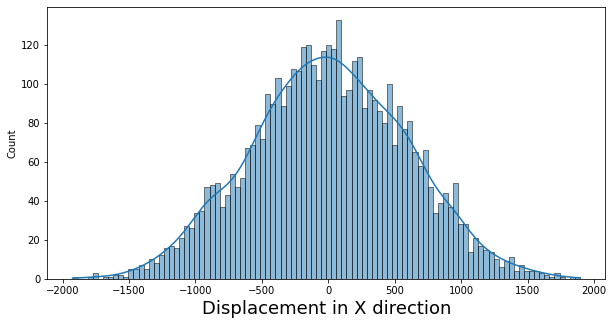

In [ ]:
difference = [] #initialization of result list.
zip_object = zip(x_frame_0, x_frame_1_new)
for list1_i, list2_i in zip_object:
    difference. append(list1_i-list2_i) #append each difference to list

sns.histplot(data = difference,kde = True,bins = 100)
plt.xlabel("Displacement in X direction",size  = 18)

In [ ]:
y_frame_0 = list(t[t['frame']==0]['y'])
y_frame_1 = list(t[t['frame']==1]['y'])

y_frame_1_new = y_frame_1[:4473]
l1 = len(x_frame_0)
l2 = len(x_frame_1_new)

(l1,l2)

(4473, 4473)

Text(0.5, 0, 'Displacement in y direction')

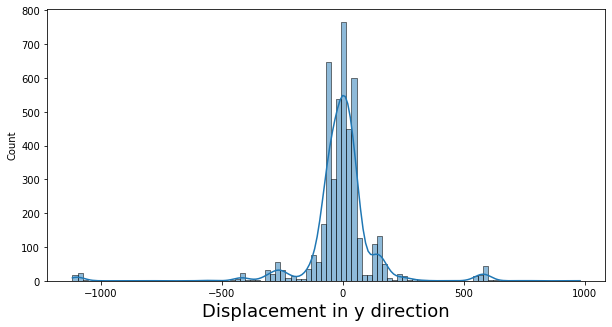

In [ ]:
difference_y = [] #initialization of result list.
zip_object_y = zip(y_frame_0, y_frame_1_new)
for list1_i, list2_i in zip_object_y:
    difference_y. append(list1_i-list2_i) #append each difference to list

sns.histplot(data = difference_y,kde = True,bins = 100)
plt.xlabel("Displacement in y direction",size  = 18)

In [ ]:
# cartesian displacement
import math

Text(0.5, 0, 'cartesian displacement')

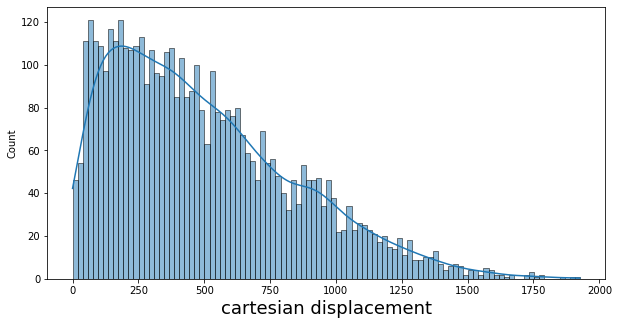

In [ ]:
a = [1,2,3]
def square(a):
    li = []
    for i in a: li.append(i**2)
    return li

x_dis = []
for i in difference: x_dis.append(i**2)

y_dis = []
for i in difference_y: y_dis.append(i**2)


displacement = [] #initialization of result list.
zip_object_disp = zip(x_dis,y_dis)
for list1_i, list2_i in zip_object_disp:
    displacement.append(math.sqrt(list1_i+list2_i))

sns.histplot(data = displacement,kde = True,bins = 100)
plt.xlabel("cartesian displacement",size  = 18)

Text(0.5, 0, 'manhatta displacement')

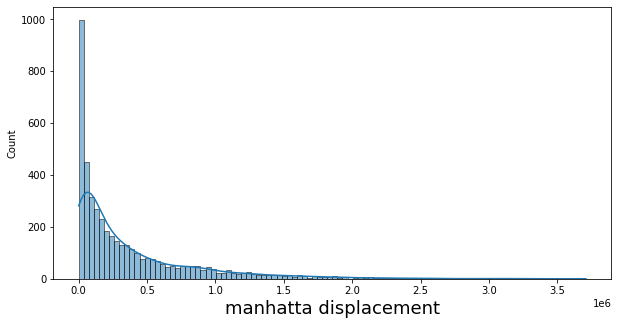

In [ ]:
## manhattan distance 

manhatan_displacement = [] #initialization of result list.
zip_object_disp = zip(x_dis,y_dis)
for list1_i, list2_i in zip_object_disp:
    manhatan_displacement.append((abs(list1_i)+abs(list2_i)))

sns.histplot(data = manhatan_displacement,kde = True,bins = 100)
plt.xlabel("manhattan displacement",size  = 18)

### Some additional things we try to visulize using the trackpy documentation.

We have more filtering to do. Ephemeral trajectories — seen only for a few frames — are usually spurious and never useful. The convenience function filter_stubs keeps only trajectories that last for a given number of frames

In [ ]:
t1 = tp.filter_stubs(t, 25)
# Compare the number of particles in the unfiltered and filtered data.
print('Before:', t['particle'].nunique())
print('After:', t1['particle'].nunique())

Before: 29766
After: 6557


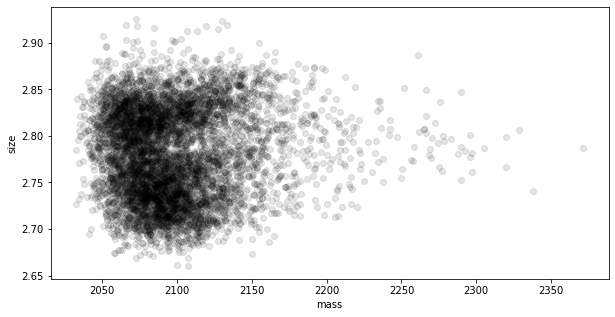

In [ ]:
plt.figure()
tp.mass_size(t1.groupby('particle').mean()); # convenience function -- just plots size vs. mass

In [ ]:
t2 = t1[((t1['mass'] > 2000) &
         (t1['ecc'] < 0.3))]

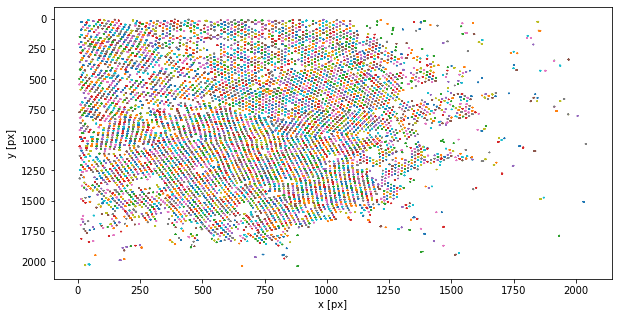

In [ ]:
plt.figure()
tp.plot_traj(t2);

##Remove overall drift

In [ ]:
d = tp.compute_drift(t2)

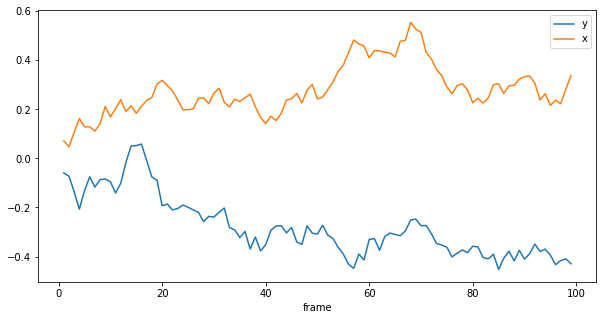

In [ ]:
d.plot()
plt.show()

In [ ]:
tm = tp.subtract_drift(t2.copy(), d)

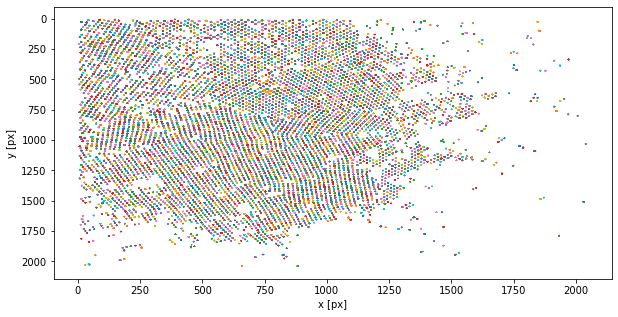

In [ ]:
ax = tp.plot_traj(tm)
plt.show()

## Analyze trajectories

In [ ]:
im = tp.imsd(tm, 100/285., 24)  # microns per pixel = 100/285., frames per second = 24

Mean Squared Displacement of Individal Probes

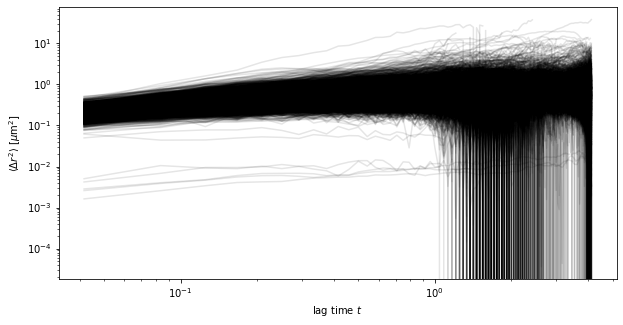

In [ ]:
fig, ax = plt.subplots()
ax.plot(im.index, im, 'k-', alpha=0.1)  # black lines, semitransparent
ax.set(ylabel=r'$\langle \Delta r^2 \rangle$ [$\mu$m$^2$]',
       xlabel='lag time $t$')
ax.set_xscale('log')
ax.set_yscale('log')

Since we only analyzed 100 frames, the statistics are poor at large lag times. With more frames, we can study larger lag times.